## Linear Regression Key Assumptions
1. Linear Relationship
2. All variables follows normal distribution
3. There is very little or no multicollinearity 
4. There is little or no autocorrelation
5. Data is Homoscedastic

###  Linear Relationship
Aims at finding linear relationship between independent and dependent variables.

A simple visual way of determining this is through the use of scatter plot.

### Variables follows a Gaussian Distribution
Independent and dependent variables is a random variable following a normal distribution.

This assumption is through the use Quantile-Quantile plot or histogram


### Little or no multicollinearity 
This assumptions aims to test correlation between explanatory variables

If this assumptions is violated, independent variables are no longer independent to each other

We can test this by using correlation test between independent variables or we can use variance inflation factor VIF and condition index

If you find any values in which the absolute value of their correlation is > 0.8 then, multicollinearity is broken.

### Little or no Autocorrelation
This next assumptions is much lke our previous assumption but it applies to the residuals of your linear regression model.
Linear regression analysis that there is little or no autocorrrelation in the data.

We can test this assumption by using Durbin-Watson test (d). While d can assume values 0-4, values around 2 indicate no autocorrelation. As a rule of thumb values 1.5.A rule of thumb is that test statistic values in the range of 1.5 to 2.5 are relatively normal

### Data is Homoscedastic 
The last assumption the linear regression analysis makes is homoscedasticity (that is error terms along the regression line are equal)

This anaysis is also applied to the residuals to your linear regression model.

Homoscedasticity can be easily tested with a scatter plot of the residuals.

## Implementing the following Assumptions in Python

In [2]:
# Importing the needed liibraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set 
import matplotlib.pyplot as plt

In [3]:
#Reading our practice data
data = pd.read_csv ("data.csv")

In [4]:
#Do some EDA
data.isnull ().sum ()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
data.describe ().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [7]:
#PERFORM MULTICOLLINEARITY - USING THE CORRELATION METHOD
correlation_spearman = data.corr (method = "spearman")
correlation_pearson = data.corr ()

In [10]:
correlation_spearman

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.192226,0.709905,0.989844
Administration,0.192226,1.000000,-0.096096,0.168595
Marketing Spend,0.709905,-0.096096,1.000000,0.721366
Profit,0.989844,0.168595,0.721366,1.000000


In [11]:
correlation_pearson

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Text(0.5, 1.05, 'Scatter Plot')

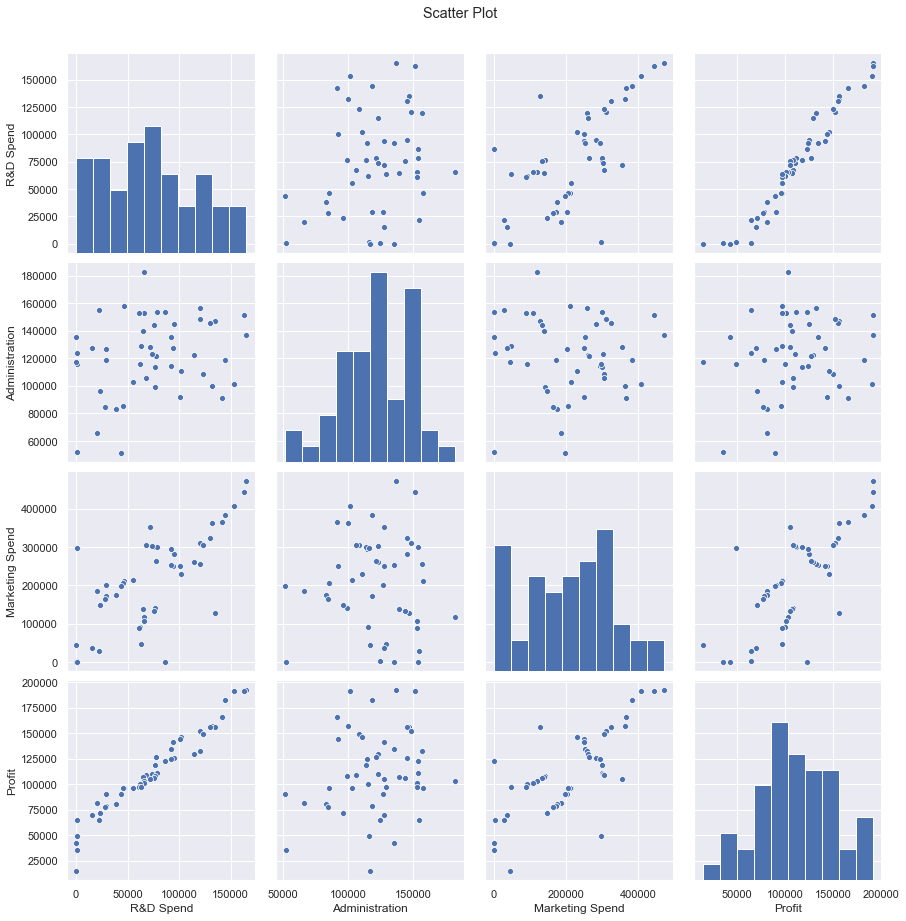

In [64]:
#PERFORM LINEARITY AND NORMALITY TEST
sns.set (style = "darkgrid", color_codes = True )
linearity_normality_plot = sns.pairplot (data, height = 3, diag_kind = "hist", kind ="scatter")
linearity_normality_plot.fig.suptitle("Scatter Plot", y = 1.05)

In [26]:
#PERFORM HOMOSCEDASTICITY - WE NEED TO BUILD MODEL AT THIS POINT TO SEE HOW RESIDUALS ARE DISTRIBUTED
import statsmodels.api as sm
X = data[["R&D Spend","Administration","Marketing Spend"]]
y = data["Profit"]

In [27]:
#we need to add a new column for our new feature which is a constant
X1 = sm.add_constant (X)

In [29]:
#Train the model
model = sm.OLS (y,X1).fit ()

In [30]:
model.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           4.53e-30
Time:                        15:01:23   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R&D Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
y_predict = model.predict (X1).round (0)
y_predict = pd.DataFrame (y_predict).rename (columns ={0:"Predicted Profit"})
y_predicted_actual = pd.concat ([y_predict,y], axis =1)
y_predicted_actual

,Predicted Profit,Profit
0,192521.0,192261.83
1,189157.0,191792.06
2,182147.0,191050.39
3,173697.0,182901.99
4,172140.0,166187.94
5,163581.0,156991.12
6,158114.0,156122.51
7,160021.0,155752.60
8,151742.0,152211.77
9,154885.0,149759.96


In [44]:
#COMPUTE FOR THE RESIDUALS AND PLOT 
residuals = y_predicted_actual ["Predicted Profit"]-y_predicted_actual ["Profit"]
residuals

0       259.17
1     -2635.06
2     -8903.39
3     -9204.99
4      5952.06
5      6589.88
6      1991.49
7      4268.40
8      -469.77
9      5125.04
10   -10612.95
11    -8685.40
12   -12447.52
13    -6819.35
14    16946.35
15    16317.96
16   -10077.93
17     4821.63
18     4747.10
19    -7141.86
20    -1834.03
21     6005.98
22     4354.75
23     1263.01
24     4810.96
25    -5166.34
26     4867.46
27     9399.69
28    -1622.38
29      790.36
30     -485.59
31      204.44
32     1573.16
33     1136.08
34    -7673.80
35    -5967.51
36   -15422.19
37     -329.14
38   -11532.06
39     2723.24
40    -3423.91
41    -2995.83
42     -878.49
43    -9591.98
44     -589.33
45   -17275.08
46     6675.25
47     3931.27
48    13497.59
49    33533.60
dtype: float64

Text(0.5, 1.08, 'Visualization for Homoscedasticity Assumption')

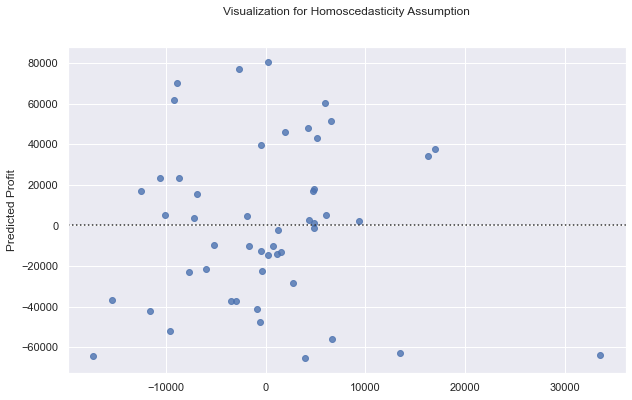

In [50]:
fig = plt.subplots (figsize =(10,6))
sns.residplot (residuals, y_predicted_actual ["Predicted Profit"])
plt.title ("Visualization for Homoscedasticity Assumption", y=1.08)

In [54]:
#PERFORM NOMRALITY PLOT FOR THE ERROR TERMS OR RESIDUALS
import scipy.stats as stats

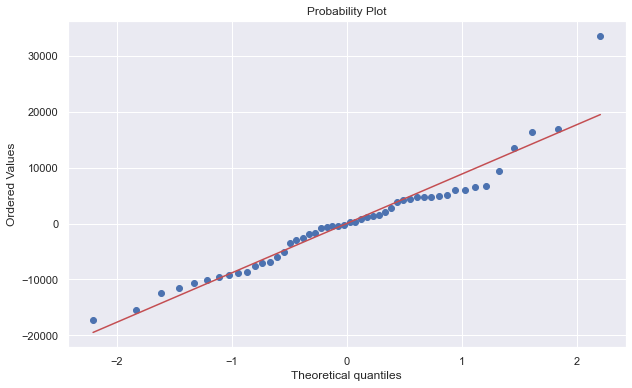

In [61]:
fig = plt.subplots (figsize =(10,6))
stats.probplot (residuals, dist ="norm", plot =plt)
plt.show ()

# Conclusion from this Evaluation
1. Marketing Spend and R & D Spend are correlated with correlation coefficient greater than 0.50
2. Marketing Spend may will not much explained the Profit because of its low correlation coefficient to profit
3. Normality is a concern for this model, extensive visualization and measures of normality must be done to prove that it imporves and follows a normal distribution
4. Homoscedaticity (d = 1.2 ) may have positive autocorrelation
5. Normality of error terms (Skewness = -0.9, kurtosis = 0.5, JB p-value = <0, null hypothesis is rejected), dont follow normal distribution